https://www.youtube.com/watch?v=EtPFCXAAeys (Part1)
https://www.youtube.com/watch?v=vQCfMdvQo50 (Part2)
https://www.youtube.com/watch?v=ogZKw7b6V3E (Part3)
https://www.youtube.com/watch?v=l9QKmh1rOhk&t=54s (Part4)
https://www.youtube.com/watch?v=Myfvn5nGzW8 (Part5)

In [300]:
#Package Basic
from datetime import datetime, timedelta, date
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objects as go
import seaborn as sns
#Other
# from __future__ import division
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC 
from sklearn.multioutput import MultiOutputClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split


# Part 1

- Monthly Growth Rate = Tính tăng trưởng về mặt doanh thu của tháng sau so với tháng trước
- Month Active Customers = Số lượng customer hoạt động hàng tháng
- Trung bình trong 1 tháng có bao nhiêu lượng sản phẩm được bán ra 
- Số doanh thu trung bình trong 1 tháng
- New & Existing Customers
- Month New Customer Rate

In [2]:
df_retail = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

In [5]:
#Tách chỉ cần năm và tháng
df_retail['InvoiceYearMonth'] = df_retail['InvoiceDate'].map(lambda x : x.year*100 + x.month)

In [6]:
#Doanh thu
df_retail['Revenue'] = df_retail['UnitPrice'] * df_retail['Quantity']
#
df_revenue =  df_retail.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

- Monthly Growth Rate = Tính tăng trưởng về mặt doanh thu của tháng sau so với tháng trước

In [7]:
# (df_revenue['Revenue'][1] - df_revenue['Revenue'][0])/df_revenue['Revenue'][0]
# (df_revenue['Revenue'][2] - df_revenue['Revenue'][1])/df_revenue['Revenue'][1]
#Cách 1:
pct_change_li = [0]
for i in range(len(df_revenue)-1):
    pct_change = (df_revenue['Revenue'][i+1] - df_revenue['Revenue'][i])/df_revenue['Revenue'][i]
    pct_change_li.append(pct_change)
df_revenue['MonthlyGrowth'] = pct_change_li
#Cách 2:
# df_revenue['Revenue'].pct_change()

In [8]:
plot_data = [
    go.Scatter(
        x=df_revenue[df_revenue['InvoiceYearMonth'] != '201112']['InvoiceYearMonth'],
        y=df_revenue[df_revenue['MonthlyGrowth'] != '201112']['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Month Growth Rate'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

- Month Active Customers = Số lượng customer hoạt động hàng tháng

In [9]:
df_uk = df_retail[df_retail['Country'] == 'United Kingdom'].reset_index(drop=True)

In [10]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [11]:
df_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In [12]:
plot_data = [
    go.Bar(
        x=df_monthly_active['InvoiceYearMonth'],
        y=df_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Month Active Customers'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [13]:
#Mỗi tháng trung bình có 948 khách hàng
df_monthly_active['CustomerID'].mean()

948.4615384615385

- Trung bình trong 1 tháng có bao nhiêu lượng sản phẩm được bán ra 

In [14]:
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

In [15]:
df_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


In [16]:
plot_data = [
    go.Bar(
        x=df_monthly_sales['InvoiceYearMonth'],
        y=df_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Month Total # of Order'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [17]:
#Trung bình mỗi tháng bán được 327k sản phẩm
df_monthly_sales['Quantity'].mean()

327986.8461538461

- Số doanh thu trung bình trong 1 tháng

In [18]:
df_monthly_order_avg = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

In [19]:
df_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


In [20]:
plot_data = [
    go.Bar(
        x=df_monthly_order_avg['InvoiceYearMonth'],
        y=df_monthly_order_avg['Revenue'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Month Order Average'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [21]:
#Trung bình mỗi tháng bán được 16tr
df_monthly_order_avg['Revenue'].mean()

16.470474962013903

- New & Existing Customers

In [22]:
df_min_purchase = df_uk.groupby('CustomerID')['InvoiceDate'].min().reset_index()

In [23]:
df_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']

In [24]:
#Tách chỉ cần năm và tháng
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda x : x.year*100 + x.month)

In [25]:
df_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [26]:
df_uk = pd.merge(df_uk, df_min_purchase, on='CustomerID')

In [27]:
df_uk['UserType'] = 'New'

In [28]:
df_uk.loc[df_uk['InvoiceYearMonth'] != df_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

In [29]:
df_uk['UserType'].value_counts()

UserType
Existing    256114
New         105764
Name: count, dtype: int64

In [30]:
#Xoá 2 năm đầu và cuối (Đầu vì chỉ có cột New còn cuối vì :))
df_user_type_revenue = df_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
#Display
df_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


In [31]:
plot_data = [
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Revenue of New vs Existing Customer'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

- Month New Customer Rate

In [32]:
countNew = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
countNew

InvoiceYearMonth
201012    871
201101    362
201102    339
201103    408
201104    276
201105    252
201106    207
201107    172
201108    140
201109    275
201110    318
201111    296
201112     34
Name: CustomerID, dtype: int64

In [33]:
countExisting = df_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
countExisting

InvoiceYearMonth
201101     322
201102     375
201103     515
201104     541
201105     733
201106     736
201107     727
201108     727
201109     902
201110     967
201111    1252
201112     583
Name: CustomerID, dtype: int64

In [34]:
df_user_ratio = countNew/countExisting
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['InvoiceYearMonth','New_Customer_Rate']

In [35]:
df_user_ratio

,InvoiceYearMonth,New_Customer_Rate
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


In [36]:
plot_data = [
    go.Bar(
        x=df_user_ratio['InvoiceYearMonth'],
        y=df_user_ratio['New_Customer_Rate'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'New Customer Ratio'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

# Part 2

- Month Retention Rate
- Churn Rate
- Cohort Base Retention

### Month Retention Rate


#1. Monthly Retention Rate Analysis

Là bước tính toán tỷ lệ khách hàng duy trì của tháng hiện tại so với tháng trước

Câu hỏi: Trong tháng 10-2022 có bao nhiêu khách hàng duy trì mua hàng so với tháng 09-2022?

Ví dụ: tháng 09-2022 có 300 khách hàng, tháng 10-2022 có 400 khách hàng trong đó có 30 khách hàng đã mua hàng trong tháng 09-2022
=))) Tỷ lệ khách hàng duy trì R = 30/300 = 0.1 ~ 10%
(ngoài ra có thể nhận thấy tháng 10-2022 có 470 new customers và 30 existing cusomers so với tháng 09-2022)

In [37]:
df_uk['InvoiceYearMonth'] = df_uk['InvoiceDate'].map(lambda date : date.year*100 + date.month)
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_user_purchase = df_uk.groupby(['CustomerID', 'InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()
df_user_purchase.Revenue.sum()
df_retention = pd.crosstab(df_user_purchase['CustomerID'],df_user_purchase['InvoiceYearMonth']).reset_index()
months = df_retention.columns[2:]

In [38]:
#Tổng số khách hàng của tháng 1 năm 2011
df_retention[201101].sum()

684

In [39]:
#Tổng số khách hàng duy trì của tháng 02 với tháng 01 năm 2011
df_retention[(df_retention[201102] == 1) & df_retention[201101] == 1][201101].sum()

#Hàm để chạy vòng lặp qua các tháng
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]==1) & (df_retention[prev_month]==1)][selected_month].sum()
    retention_array.append(retention_data)
    print("*********************" + str(selected_month) + "*********************")
    print(retention_array)

*********************201102*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}]
*********************201103*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}]
*********************201104*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}, {'InvoiceYearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310}]
*********************201105*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}, {'InvoiceYearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310}, {'InvoiceYearMonth': 201105, 'TotalUserCount': 985, 'RetainedUserCount': 369}]
**********

In [40]:
#Hàm để chạy vòng lặp qua các tháng
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]==1) & (df_retention[prev_month]==1)][selected_month].sum()
    retention_array.append(retention_data)
    print("*********************" + str(selected_month) + "*********************")
    print(retention_array)

*********************201102*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}]
*********************201103*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}]
*********************201104*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}, {'InvoiceYearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310}]
*********************201105*********************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}, {'InvoiceYearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310}, {'InvoiceYearMonth': 201105, 'TotalUserCount': 985, 'RetainedUserCount': 369}]
**********

In [41]:
df_retention = pd.DataFrame(retention_array)

In [42]:
#Đối với tháng 3 2011 tổng user là 923 và số user duy trì là 305 (Người cũ quay lại tháng sau mua)
df_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,985,369
4,201106,943,417
5,201107,899,379
6,201108,867,391
7,201109,1177,417
8,201110,1285,502
9,201111,1548,616


In [43]:
df_retention['RetentionRate'] = df_retention['RetainedUserCount'] / df_retention['TotalUserCount']

In [44]:
plot_data = [
    go.Scatter(
        x=df_retention['InvoiceYearMonth'],
        y=df_retention['RetentionRate'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Monthly Retention Rate'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

### Churn Rate

#2. Monthly Churn Rate

Tiếp tục lấy dữ liệu phân tích ví dụ ở mục 1

Tỷ lệ khách hàng rời đi C = (300-30)/300 = 0.9 ~ 90%
Hoặc C = 1 - R = 1 - 0.1 = 0.9

In [45]:
df_retention['ChurnRate'] = 1 - df_retention['RetentionRate']

In [46]:
plot_data = [
    go.Scatter(
        x=df_retention['InvoiceYearMonth'],
        y=df_retention['ChurnRate'],
    )
]

plot_layout = go.Layout(
    xaxis={'type': "category"},
    title = 'Monthly Churn Rate'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

### Cohort Base Retention

#3. Cohort Analysis Base Retention

Tương tự với Retention Rate, thì phân tích Cohort sẽ cho cái nhìn chi tiết, tổng quan hơn theo từng tháng, năm.

Cụ thể, lấy 1 tháng bất kỳ so với tất cả các kế tiếp, tỷ lệ khách hàng qua từng tháng là bao nhiêu

Ví dụ: tháng 10, 11, 12 năm 2022 có tỷ lệ khách hàng duy trì là bao nhiêu so với tháng 09-2022?

InvoiceYearMonth 202209
TotalUserCount 362
202210 0.4
202211 0.23
202212 0.28

Cách tính cũng tương tự như Retention Rate. Theo ví dụ bên trên thì tháng 10-2022 có tỷ lệ khách hàng duy trì so với tháng 09-2022 là 40%, tháng 11-2022 là 23% và tháng 12-2022 là 28%


In [47]:
df_user_purchase.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771


In [48]:
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
df_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [49]:
df_retention = pd.crosstab(df_user_purchase['CustomerID'],df_user_purchase['InvoiceYearMonth']).reset_index()
df_retention

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


In [50]:
df_retention = pd.merge(df_retention,df_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
df_retention

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [51]:
new_column_names = ['m_' + str(column) for column in df_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
df_retention.columns = new_column_names
df_retention


,m_CustomerID,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [52]:
selected_month = months[4] #Tháng hiện tại
prev_months = months[:4] #Tháng trước đó của tháng hiện tại
next_months = months[5:]  #Tháng sau đó của tháng hiện tại

total_user_count = df_retention[df_retention['MinPurchaseYearMonth'] == 201101]['MinPurchaseYearMonth'].count()

df_retention.query("MinPurchaseYearMonth == 201101 and {} == 1".format(str('m_' + str(201102))))['m_' + str(201102)].sum()/total_user_count

0.23204419889502761

In [53]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan 

    total_user_count = df_retention[df_retention.MinPurchaseYearMonth == selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1

    query = "MinPurchaseYearMonth == {}".format(selected_month)

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

df_retention = pd.DataFrame(retention_array) 
df_retention.index = months
df_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12


# Part 3

### Customer Segmentation
#### Segmentation by RFM
- Recency
- Frequency
- Monetary Value

Clustering -> Kmeans

##### Recency

In [54]:
tx_data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

In [55]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [56]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate']).dt.date

In [57]:
tx_data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [58]:
tx_uk = tx_data.query("Country == 'United Kingdom'").reset_index(drop=True)
tx_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [59]:
# Recency - Quý 2 - 2011 (03-2011 -> 06-2011)
tx_3m = tx_uk[(tx_uk['InvoiceDate'] < date(2011,6,1)) & (tx_uk['InvoiceDate'] >= date(2011,3,1))].reset_index(drop=False)
tx_3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95193 entries, 0 to 95192
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        95193 non-null  int64  
 1   InvoiceNo    95193 non-null  object 
 2   StockCode    95193 non-null  object 
 3   Description  94664 non-null  object 
 4   Quantity     95193 non-null  int64  
 5   InvoiceDate  95193 non-null  object 
 6   UnitPrice    95193 non-null  float64
 7   CustomerID   71683 non-null  float64
 8   Country      95193 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.5+ MB


In [60]:
tx_user = pd.DataFrame(tx_3m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [61]:
tx_max_purchase = tx_3m.groupby('CustomerID').InvoiceDate.max().reset_index()

tx_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']

tx_max_purchase['MaxPurchaseDate'] = pd.to_datetime(tx_max_purchase['MaxPurchaseDate'])


tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

In [62]:
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
tx_user.Recency.describe()

count    1840.000000
mean       35.338043
std        26.220317
min         0.000000
25%        12.000000
50%        26.000000
75%        56.000000
max        91.000000
Name: Recency, dtype: float64

In [63]:
plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]
plot_layout = go.Layout(
    title='Recency'
)

fig = go .Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\TMQ\anacond

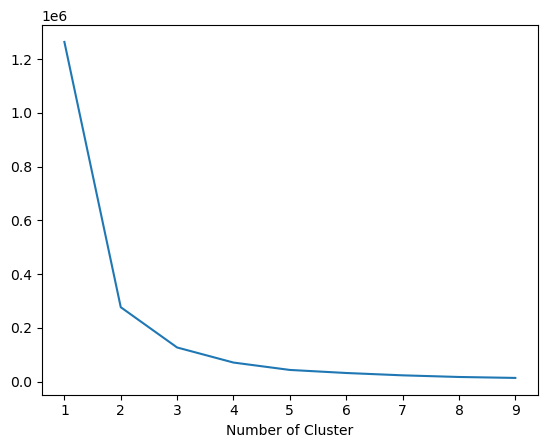

In [64]:
sse={}
tx_recency = tx_user[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(tx_recency)
    tx_recency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.show();

In [65]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

# tx_user.head()

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



In [66]:
#Sắp xếp các cụm theo mean để cụm 0 là lớn nhất (77.01...) , cụm 3 là nhỏ nhất (8,5...)
tx_user.groupby('RecencyCluster')['Recency'].describe()

df_new = tx_user.groupby('RecencyCluster')['Recency'].mean().reset_index()
df_new = df_new.sort_values(by='Recency', ascending=False).reset_index(drop=True)
df_new['index'] = df_new.index
tx_user = pd.merge(tx_user, df_new[['RecencyCluster', 'index']], on='RecencyCluster')
tx_user = tx_user.drop(['RecencyCluster'],axis=1)
tx_user = tx_user.rename(columns={"index":"RecencyCluster"})

##### Frequency

In [67]:
tx_frequency = tx_3m.groupby('CustomerID').InvoiceDate.count().reset_index()

tx_frequency.columns = ['CustomerID', 'Frequency']

tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

tx_user.Frequency.describe()

count    1840.000000
mean       38.958152
std        60.968929
min         1.000000
25%        12.000000
50%        23.000000
75%        47.000000
max      1364.000000
Name: Frequency, dtype: float64

In [68]:
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency<1000')['Frequency']
    )
]
plot_layout = go.Layout(
    title='Frequency'
)

fig = go .Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\4047468358.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4

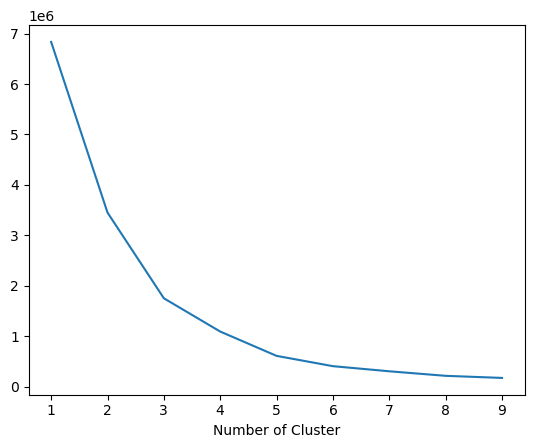

In [69]:
sse={}
tx_frequency = tx_user[['Frequency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(tx_frequency)
    tx_frequency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.show();

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

tx_user.head()
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1605.0,24.218069,17.761893,1.0,10.0,20.0,36.0,70.0
1,11.0,496.000000,125.912668,331.0,422.5,452.0,570.0,730.0
2,223.0,116.560538,43.816927,71.0,83.5,104.0,131.5,285.0
3,1.0,1364.000000,NaN,1364.0,1364.0,1364.0,1364.0,1364.0


In [71]:
#Sắp xếp các cụm theo mean để cụm 0 là bé nhất (24.21...) , cụm 3 là lớn nhất (1364...)
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

df_new = tx_user.groupby('FrequencyCluster')['Frequency'].mean().reset_index()
df_new = df_new.sort_values(by='Frequency', ascending=True).reset_index(drop=True)
df_new['index'] = df_new.index
tx_user = pd.merge(tx_user, df_new[['FrequencyCluster', 'index']], on='FrequencyCluster')
tx_user = tx_user.drop(['FrequencyCluster'],axis=1)
tx_user = tx_user.rename(columns={"index":"FrequencyCluster"})
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,14620.0,12,3,30,0
1,15194.0,6,3,64,0
2,18044.0,6,3,57,0
3,18075.0,12,3,35,0
4,15241.0,0,3,64,0
...,...,...,...,...,...
1835,12748.0,0,3,582,2
1836,14056.0,5,3,331,2
1837,14769.0,9,3,558,2
1838,14298.0,27,2,433,2


##### Monetary Value

In [72]:
tx_3m['Revenue'] = tx_3m['UnitPrice'] * tx_3m['Quantity']

tx_revenue = tx_3m.groupby('CustomerID')['Revenue'].sum().reset_index()

tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')


In [73]:
tx_user['Revenue'].describe()

count     1840.000000
mean       738.715017
std       1640.430156
min      -1462.500000
25%        210.237500
50%        369.825000
75%        749.490000
max      35085.480000
Name: Revenue, dtype: float64

In [74]:
plot_data = [
    go.Histogram(
        x=tx_user.query('Revenue < 10000')['Revenue']
    )
]
plot_layout = go.Layout(
    title='Monetary Value'
)

fig = go .Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\460519223.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4.

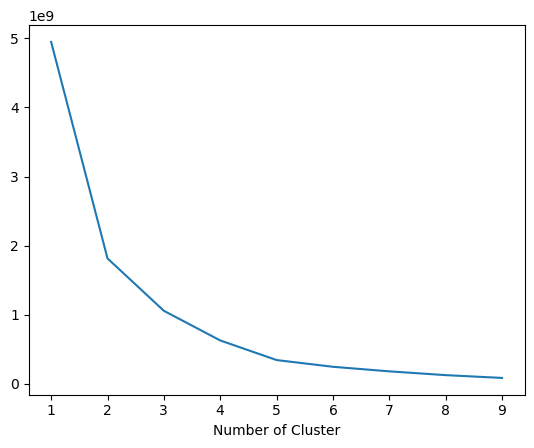

In [75]:
sse={}
tx_revenue = tx_user[['Revenue']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(tx_revenue)
    tx_revenue['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.show();

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

tx_user.head()
tx_user.groupby('RevenueCluster')['Revenue'].describe()

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1756.0,504.760245,444.567580,-1462.50,204.3075,349.590,666.8325,2131.72
1,10.0,14092.686000,2855.109881,10348.13,11268.3675,15124.345,16124.8250,17700.64
2,72.0,3760.423486,1538.877714,2159.16,2685.1875,3141.610,4222.5050,7969.99
3,2.0,30599.645000,6343.928696,26113.81,28356.7275,30599.645,32842.5625,35085.48


In [77]:
#Sắp xếp các cụm theo mean để cụm 0 là bé nhất (504...) , cụm 3 là lớn nhất (30599...)
tx_user.groupby('RevenueCluster')['Revenue'].describe()

df_new = tx_user.groupby('RevenueCluster')['Revenue'].mean().reset_index()
df_new = df_new.sort_values(by='Revenue', ascending=True).reset_index(drop=True)
df_new['index'] = df_new.index
tx_user = pd.merge(tx_user, df_new[['RevenueCluster', 'index']], on='RevenueCluster')
tx_user = tx_user.drop(['RevenueCluster'],axis=1)
tx_user = tx_user.rename(columns={"index":"RevenueCluster"})
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,14620.0,12,3,30,0,393.28,0
1,15194.0,6,3,64,0,1439.02,0
2,18044.0,6,3,57,0,808.96,0
3,18075.0,12,3,35,0,638.12,0
4,15241.0,0,3,64,0,947.55,0
...,...,...,...,...,...,...,...
1835,17511.0,14,3,199,1,17307.53,2
1836,16684.0,13,3,73,1,15263.96,2
1837,15311.0,4,3,522,2,16309.61,2
1838,13089.0,5,3,452,2,11757.87,2


##### Overall Segmentation (Tổng hợp 3 Cluster của RFM)

In [78]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

tx_user.groupby('OverallScore')[['Recency', 'Frequency', 'Revenue']].mean()


,Recency,Frequency,Revenue
OverallScore,,,
0,77.145833,18.485119,295.299613
1,51.057416,24.495215,367.926962
2,26.792857,31.028571,500.973095
3,10.434959,36.652439,633.871402
4,8.304688,103.835938,1983.985086
5,6.758621,138.965517,4326.155172
6,7.428571,322.071429,12177.627143
7,3.000000,779.333333,11350.896667


In [79]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value'
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value'

##### Visualization

In [80]:
# Frequency vs Revenue
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker = dict(size = 7,
                      line = dict(width=1),
                      color = 'blue',
                      opacity = 0.8
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker = dict(size = 9,
                      line = dict(width=1),
                      color = 'green',
                      opacity = 0.5
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker = dict(size = 11,
                      line = dict(width=1),
                      color = 'red',
                      opacity = 0.9
                      )
    ),
]

plot_layout = go.Layout(
    yaxis = {'title': "Revenue"},
    xaxis = {'title': "Frequency"},
    title ='Segments'
)
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [81]:
# Recency vs Revenue
tx_graph = tx_user.query("Revenue < 50000 and Recency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker = dict(size = 7,
                      line = dict(width=1),
                      color = 'blue',
                      opacity = 0.8
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker = dict(size = 9,
                      line = dict(width=1),
                      color = 'green',
                      opacity = 0.5
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker = dict(size = 11,
                      line = dict(width=1),
                      color = 'red',
                      opacity = 0.9
                      )
    ),
]

plot_layout = go.Layout(
    yaxis = {'title': "Revenue"},
    xaxis = {'title': "Recency"},
    title ='Segments'
)
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [82]:
# Recency vs Frequency
tx_graph = tx_user.query("Recency < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker = dict(size = 7,
                      line = dict(width=1),
                      color = 'blue',
                      opacity = 0.8
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker = dict(size = 9,
                      line = dict(width=1),
                      color = 'green',
                      opacity = 0.5
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker = dict(size = 11,
                      line = dict(width=1),
                      color = 'red',
                      opacity = 0.9
                      )
    ),
]

plot_layout = go.Layout(
    yaxis = {'title': "Revenue"},
    xaxis = {'title': "Frequency"},
    title ='Segments'
)
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [83]:
def df_userRFM():
    return tx_data, tx_uk, tx_user

# Part 4

Lifetime Value - LTV
https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value

1. Select a time window. It can be anything like 3, 6, 12, 24 months

2. Lifetime Value: Total Gross Revenue - Total Cost

3. Build a simple machine learning model that predicts out customers lifetime value.

- Define a appropriate time frame for Customer Liftime Value calculation
- Identify the features we are going to use to predict future and create them
- Calculate lifetime value (LTV) for training the machine learning mode
- Build and run the machine learning model
- Check if the model is useful


In [84]:
# Nếu tách ra từng Part là các file khác nhau thì đâu là cách gọi lại hàm của file khác qua file này
# from RFM import df_userRFM

In [85]:
# tx_data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

#### 3 months of data, caculate RFM, use it for predict next 6 months

##### Calculate revenue and create a new dataframe for it

In [86]:
# Calculate revenue and create a new dataframe for it
tx_data, tx_uk, tx_user = df_userRFM()

In [87]:
tx_6m = tx_uk[(tx_uk['InvoiceDate'] >=date(2011,6,11)) & (tx_uk['InvoiceDate'] < date(2011,12,1))]

tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']

tx_user_6m = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['CustomerID', 'm6_Revenue']

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\667428575.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
#Plot LTV Histogram
plot_data = [
    go.Histogram(
        x=tx_user_6m.query('m6_Revenue < 10000')['m6_Revenue']
    )
]

plot_layout = go.Layout(
    title = 'm6_Revenue'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

##### Merge our 3 months and 6 months dataframes to see correlations between LTV and the feature set we have 

In [89]:
tx_merge = pd.merge(tx_user, tx_user_6m, on='CustomerID',how='left')
tx_merge = tx_merge.fillna(0)
tx_merge.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,0.00
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value,3235.45
2,18044.0,6,3,57,0,808.96,0,3,Mid-Value,991.54
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value,691.08


In [90]:
#Plot Scatter
# Frequency vs Revenue
tx_graph = tx_merge.query("m6_Revenue < 30000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Low-Value'")['m6_Revenue'],
        mode='markers',
        name='Low',
        marker = dict(size = 7,
                      line = dict(width=1),
                      color = 'blue',
                      opacity = 0.8
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Mid-Value'")['m6_Revenue'],
        mode='markers',
        name='Mid',
        marker = dict(size = 9,
                      line = dict(width=1),
                      color = 'green',
                      opacity = 0.5
                      )
    ),
    go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'High-Value'")['m6_Revenue'],
        mode='markers',
        name='High',
        marker = dict(size = 11,
                      line = dict(width=1),
                      color = 'red',
                      opacity = 0.9
                      )
    ),
]

plot_layout = go.Layout(
    yaxis = {'title': "6m LTV"},
    xaxis = {'title': "RFM Score"},
    title ='Segments'
)
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [91]:
#Remove outliers
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]

In [92]:
#Creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



In [93]:
tx_merge.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1413.0,387.602959,417.958000,-609.40,0.0000,278.340,665.700,1455.17
1,44.0,8660.557955,2900.598665,5630.22,6276.4100,7465.615,10907.005,15115.60
2,364.0,2526.740604,1015.175752,1469.11,1707.5425,2146.120,3119.940,5498.07


In [94]:
#Order Cluster number based on LTV
df_new = tx_merge.groupby('LTVCluster')['m6_Revenue'].mean().reset_index()
df_new = df_new.sort_values(by='m6_Revenue', ascending=False).reset_index(drop=True)
df_new['index'] = df_new.index
tx_merge = pd.merge(tx_merge, df_new[['LTVCluster', 'index']], on='LTVCluster')
tx_merge = tx_merge.drop(['LTVCluster'],axis=1)
tx_merge = tx_merge.rename(columns={"index":"LTVCluster"})
tx_merge.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,0.00,2
1,18044.0,6,3,57,0,808.96,0,3,Mid-Value,991.54,2
2,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75,2
3,15241.0,0,3,64,0,947.55,0,3,Mid-Value,691.08,2
4,15660.0,4,3,34,0,484.62,0,3,Mid-Value,858.09,2


In [95]:
#Creating new cluster dataframe
tx_cluster = tx_merge.copy()
tx_cluster.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,0.00,2
1,18044.0,6,3,57,0,808.96,0,3,Mid-Value,991.54,2
2,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75,2
3,15241.0,0,3,64,0,947.55,0,3,Mid-Value,691.08,2
4,15660.0,4,3,34,0,484.62,0,3,Mid-Value,858.09,2


In [96]:
#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,44.0,8660.557955,2900.598665,5630.22,6276.4100,7465.615,10907.005,15115.60
1,364.0,2526.740604,1015.175752,1469.11,1707.5425,2146.120,3119.940,5498.07
2,1413.0,387.602959,417.958000,-609.40,0.0000,278.340,665.700,1455.17


There are few more step before training the machine learning model:
- Need to do some feature engineering. We should convert categorical columns to numerical columns
- We will check the correlation of features against out label, LTV clusters.
- We will split out feature set and label (LTV) as X and y. We use X predict y
- Will create Training and Test dataset. Training set will be used for building the machine learning
- We will apply our model to Test set to see its real performance

In [97]:
# Convert categorical columns to numerical
tx_class = pd.get_dummies(tx_cluster, dtype=int)
tx_class.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,14620.0,12,3,30,0,393.28,0,3,0.00,2,0,0,1
1,18044.0,6,3,57,0,808.96,0,3,991.54,2,0,0,1
2,18075.0,12,3,35,0,638.12,0,3,1322.75,2,0,0,1
3,15241.0,0,3,64,0,947.55,0,3,691.08,2,0,0,1
4,15660.0,4,3,34,0,484.62,0,3,858.09,2,0,0,1


In [98]:
#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
CustomerID,1.000000,-0.002399,0.005977,-0.041699,-0.001735,-0.059981,-0.043978,-0.002121,-0.039758,0.028628,-0.051896,0.005218,0.009580
Recency,-0.002399,1.000000,-0.965430,-0.255521,-0.217303,-0.311287,-0.176972,-0.914636,-0.252715,0.238813,-0.153373,0.731578,-0.697008
RecencyCluster,0.005977,-0.965430,1.000000,0.250221,0.209263,0.313415,0.174161,0.941772,0.253475,-0.240213,0.160717,-0.807378,0.771674
Frequency,-0.041699,-0.255521,0.250221,1.000000,0.789243,0.493238,0.340535,0.477226,0.370076,-0.357279,0.470076,-0.334609,0.204241
FrequencyCluster,-0.001735,-0.217303,0.209263,0.789243,1.000000,0.457022,0.310259,0.493319,0.375584,-0.356279,0.419725,-0.351350,0.235619
Revenue,-0.059981,-0.311287,0.313415,0.493238,0.457022,1.000000,0.785147,0.512019,0.738180,-0.601674,0.577521,-0.364761,0.204002
RevenueCluster,-0.043978,-0.176972,0.174161,0.340535,0.310259,0.785147,1.000000,0.386591,0.617863,-0.460914,0.681262,-0.240919,0.048860
OverallScore,-0.002121,-0.914636,0.941772,0.477226,0.493319,0.512019,0.386591,1.000000,0.413033,-0.372255,0.354848,-0.824304,0.733209
m6_Revenue,-0.039758,-0.252715,0.253475,0.370076,0.375584,0.738180,0.617863,0.413033,1.000000,-0.841084,0.474895,-0.288153,0.155810
LTVCluster,0.028628,0.238813,-0.240213,-0.357279,-0.356279,-0.601674,-0.460914,-0.372255,-0.841084,1.000000,-0.356236,0.266091,-0.167455


In [99]:
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
Segment_Low-Value     0.266091
Recency               0.238813
CustomerID            0.028628
Segment_Mid-Value    -0.167455
RecencyCluster       -0.240213
Segment_High-Value   -0.356236
FrequencyCluster     -0.356279
Frequency            -0.357279
OverallScore         -0.372255
RevenueCluster       -0.460914
Revenue              -0.601674
m6_Revenue           -0.841084
Name: LTVCluster, dtype: float64

In [100]:
#import libraries for ML
import xgboost as xgb #XGB kết hợp giữa RDF vs DT
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
#Create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['LTVCluster', 'm6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state=56)

In [102]:
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, objective= 'multi:softprob',n_jobs=-1).fit(X_train,y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
      .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
      .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.91
Accuracy of XGB classifier on test set: 0.85


In [103]:
y_pred = ltv_xgb_model.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int64)

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      0.44      0.53        18
           2       0.87      0.96      0.91        71

    accuracy                           0.85        92
   macro avg       0.85      0.69      0.75        92
weighted avg       0.84      0.85      0.83        92



In [105]:
tx_class.groupby('LTVCluster')['CustomerID'].count()/tx_class['CustomerID'].count()

LTVCluster
0    0.024163
1    0.199890
2    0.775947
Name: CustomerID, dtype: float64

# Part 5

### Predicting Next Purchase Day

In [364]:
tx_data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

In [365]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate']).dt.date
tx_data['InvoiceDate'].describe()

count         541909
unique           305
top       2011-12-05
freq            5331
Name: InvoiceDate, dtype: object

In [366]:
tx_uk = tx_data.query("Country =='United Kingdom'").reset_index(drop=True)
#Từ tháng 3 - tháng 9
tx_6m = tx_uk[(tx_uk['InvoiceDate']<date(2011,9,1)) & (tx_uk['InvoiceDate'] >= date(2011,3,1))].reset_index(drop=True)
#Từ tháng 9 - tháng 12
tx_next = tx_uk[(tx_uk['InvoiceDate'] >= date(2011,9,1)) & (tx_uk['InvoiceDate'] < date(2011,12,1))].reset_index(drop=True)

In [367]:
tx_next['InvoiceDate'].describe()

count         178694
unique            78
top       2011-11-29
freq            4166
Name: InvoiceDate, dtype: object

In [368]:
tx_user = pd.DataFrame(tx_6m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [369]:
# Adding label
tx_next_first_purchase = tx_next.groupby('CustomerID')['InvoiceDate'].min().reset_index()
tx_next_first_purchase.columns = ['CustomerID', 'MinPurchaseDate']
tx_next_first_purchase.head()

,CustomerID,MinPurchaseDate
0,12747.0,2011-10-04
1,12748.0,2011-09-02
2,12749.0,2011-11-17
3,12820.0,2011-09-26
4,12822.0,2011-09-13


In [370]:
tx_last_purchase = tx_6m.groupby('CustomerID')['InvoiceDate'].max().reset_index()
tx_last_purchase.columns = ['CustomerID', 'MaxPurchaseDate']
tx_last_purchase.head()

,CustomerID,MaxPurchaseDate
0,12747.0,2011-08-22
1,12748.0,2011-08-30
2,12749.0,2011-08-18
3,12821.0,2011-05-09
4,12823.0,2011-08-04


In [371]:
tx_purchase_dates = pd.merge(tx_last_purchase, tx_next_first_purchase, on='CustomerID',how='left')

In [372]:
tx_purchase_dates['MinPurchaseDate'] = pd.to_datetime(tx_purchase_dates['MinPurchaseDate'])
tx_purchase_dates['MaxPurchaseDate'] = pd.to_datetime(tx_purchase_dates['MaxPurchaseDate'])
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MinPurchaseDate'] - tx_purchase_dates['MaxPurchaseDate']).dt.days
tx_purchase_dates

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12747.0,2011-08-22,2011-10-04,43.0
1,12748.0,2011-08-30,2011-09-02,3.0
2,12749.0,2011-08-18,2011-11-17,91.0
3,12821.0,2011-05-09,NaT,NaN
4,12823.0,2011-08-04,2011-09-26,53.0
...,...,...,...,...
2563,18280.0,2011-03-07,NaT,NaN
2564,18281.0,2011-06-12,NaT,NaN
2565,18282.0,2011-08-09,NaT,NaN
2566,18283.0,2011-07-14,2011-09-05,53.0


In [373]:
tx_user = pd.merge(tx_user, tx_purchase_dates[['CustomerID', 'NextPurchaseDay']],on='CustomerID',how='left')
tx_user.head()

tx_user = tx_user.fillna(999) #Coi như là không có ngày mua hàng tiếp theo
tx_user.head()

,CustomerID,NextPurchaseDay
0,14620.0,999.0
1,14740.0,999.0
2,13880.0,58.0
3,16462.0,112.0
4,17068.0,16.0


#### Feature Engineering

Selected our feature candidates like below:
- RFM scores & clusters
- Days between the last three purchases
- Mean & standard deviation of the difference between purchases in days
- After adding these features, we need to deal with the categorical features by applying get_dummies method.

##### RFM scores & clusters

- Recency

In [374]:
# Recency
tx_max_purchase = tx_6m.groupby('CustomerID')['InvoiceDate'].max().reset_index()
tx_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']
tx_max_purchase['MaxPurchaseDate'] = pd.to_datetime(tx_max_purchase['MaxPurchaseDate'])
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() -tx_max_purchase['MaxPurchaseDate']).dt.days

tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on= 'CustomerID')
tx_user.head()
tx_user['Recency'].describe()


count    2568.000000
mean       66.751168
std        52.254904
min         0.000000
25%        20.750000
50%        55.000000
75%       104.000000
max       183.000000
Name: Recency, dtype: float64

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\964368428.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4

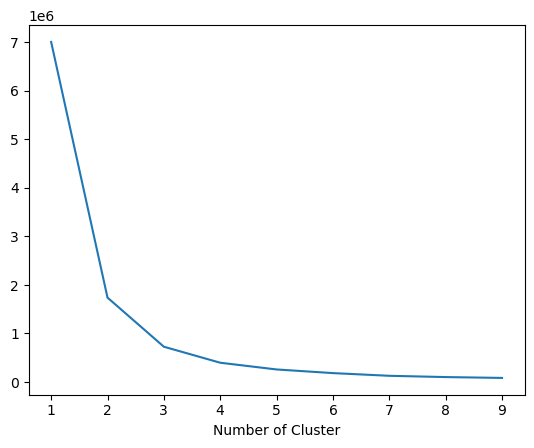

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



In [375]:
sse={}
tx_recency = tx_user[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(tx_recency)
    tx_recency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.show();

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])



In [376]:
#Hàm để sắp xếp cluster theo thứ tự
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency', tx_user,False)
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,449.0,154.694878,15.864606,126.0,141.0,154.0,167.0,183.0
1,573.0,97.153578,13.982412,75.0,85.0,98.0,110.0,125.0
2,665.0,50.972932,12.405881,33.0,40.0,49.0,62.0,73.0
3,881.0,14.066969,8.886344,0.0,7.0,13.0,21.0,31.0


- Frequency

In [377]:
# Frequency
tx_frequency = tx_6m.groupby('CustomerID')['InvoiceDate'].count().reset_index()
tx_frequency.columns = ['CustomerID', 'Frequency']
tx_frequency.head()

tx_user = pd.merge(tx_user, tx_frequency, on= 'CustomerID')
tx_user.head()
tx_user['Frequency'].describe()

count    2568.000000
mean       55.985981
std       109.245890
min         1.000000
25%        13.000000
50%        29.000000
75%        64.000000
max      3546.000000
Name: Frequency, dtype: float64

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\704735677.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4

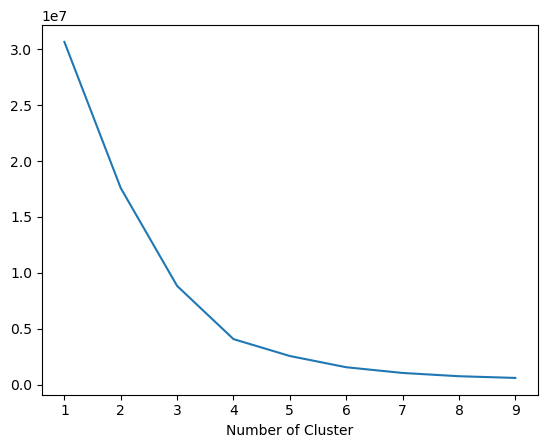

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



In [378]:
sse={}
tx_frequency = tx_user[['Frequency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(tx_frequency)
    tx_frequency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.show();

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])



In [379]:
tx_user = order_cluster('FrequencyCluster', 'Frequency', tx_user,True)
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2239.0,31.732023,26.036899,1.0,11.00,23.0,46.00,107.0
1,312.0,182.439103,70.488211,108.0,130.00,160.0,212.25,450.0
2,16.0,766.062500,260.797103,510.0,555.75,646.5,936.50,1251.0
3,1.0,3546.000000,NaN,3546.0,3546.00,3546.0,3546.00,3546.0


- Monetary Value


In [380]:
#Monetary Value
tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']
tx_revenue = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_revenue.head()


,CustomerID,Revenue
0,12747.0,1760.09
1,12748.0,8115.68
2,12749.0,2532.55
3,12821.0,92.72
4,12823.0,688.50


In [381]:
tx_user = pd.merge(tx_user, tx_revenue, on= 'CustomerID')
tx_user.head()
tx_user['Revenue'].describe()

count     2568.000000
mean      1078.621843
std       3156.461431
min      -4287.630000
25%        222.967500
50%        440.130000
75%       1026.340000
max      88948.330000
Name: Revenue, dtype: float64

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\1005132216.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\1005132216.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\1005132216.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFra

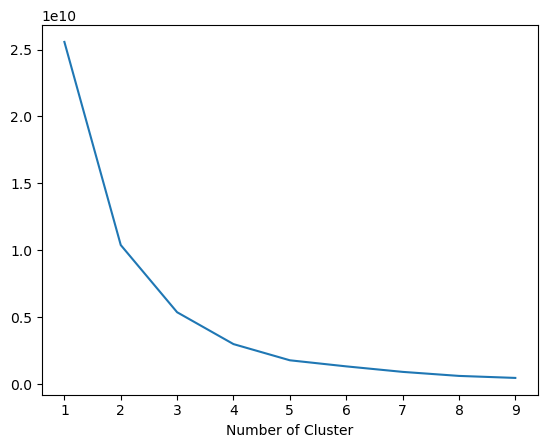

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



In [382]:
sse={}
tx_revenue = tx_user[['Revenue']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(tx_revenue)
    tx_revenue['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.show();

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])



In [383]:
tx_user = order_cluster('RevenueCluster', 'Revenue', tx_user,True)
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,2415.0,635.360862,618.311128,-4287.63,212.1850,406.480,866.6600,2906.31
1,136.0,5237.716699,2617.500448,2952.40,3282.0950,4419.950,5634.9350,13760.87
2,15.0,24656.247333,7716.951663,15847.56,17484.2400,23196.350,31386.6450,37934.22
3,2.0,76665.615000,17370.382136,64382.90,70524.2575,76665.615,82806.9725,88948.33


- Overal Segmentation

In [384]:
tx_user.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,14620.0,999.0,104,1,30,0,393.28,0
1,14740.0,999.0,91,1,93,0,1423.21,0
2,16462.0,112.0,85,1,2,0,68.00,0
3,15676.0,178.0,113,1,63,0,877.40,0
4,15092.0,999.0,115,1,26,0,457.81,0


In [385]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

# tx_user.groupby('OverallScore')[['Recency', 'Frequency', 'Revenue']].mean()

# tx_user.groupby('OverallScore')['Recency'].count()


tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value'
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value'

##### Days between the last three purchases

- Adding new features

In [386]:
tx_6m.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-01,7.95,14620.0,United Kingdom,15.90
1,545220,48194,DOORMAT HEARTS,2,2011-03-01,7.95,14620.0,United Kingdom,15.90
2,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-03-01,1.65,14620.0,United Kingdom,19.80
3,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-03-01,4.95,14620.0,United Kingdom,14.85
4,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2011-03-01,3.75,14620.0,United Kingdom,15.00


In [387]:
#create a dataframe with CustomerID and Invoice Date
tx_day_order = tx_6m[['CustomerID', 'InvoiceDate']]

In [388]:
#Convert Invoice Datetime to day
tx_day_order['InvoiceDay'] = pd.to_datetime(tx_6m['InvoiceDate']).dt.date

tx_day_order = tx_day_order.sort_values(['CustomerID','InvoiceDate'])

C:\Users\TMQ\AppData\Local\Temp\ipykernel_16524\1280878108.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
#Drop duplicates
tx_day_order = tx_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'],keep='first')
tx_day_order

,CustomerID,InvoiceDate,InvoiceDay
649,12747.0,2011-03-01,2011-03-01
65091,12747.0,2011-05-05,2011-05-05
90473,12747.0,2011-05-25,2011-05-25
124699,12747.0,2011-06-28,2011-06-28
184410,12747.0,2011-08-22,2011-08-22
...,...,...,...
186521,NaN,2011-08-24,2011-08-24
188739,NaN,2011-08-25,2011-08-25
189548,NaN,2011-08-26,2011-08-26
191270,NaN,2011-08-30,2011-08-30


In [390]:
#shifting last 3 purchase dates
tx_day_order['PrevInvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
tx_day_order['T2InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
tx_day_order['T3InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)
tx_day_order.head(10)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate
649,12747.0,2011-03-01,2011-03-01,NaN,NaN,NaN
65091,12747.0,2011-05-05,2011-05-05,2011-03-01,NaN,NaN
90473,12747.0,2011-05-25,2011-05-25,2011-05-05,2011-03-01,NaN
124699,12747.0,2011-06-28,2011-06-28,2011-05-25,2011-05-05,2011-03-01
184410,12747.0,2011-08-22,2011-08-22,2011-06-28,2011-05-25,2011-05-05
7326,12748.0,2011-03-08,2011-03-08,NaN,NaN,NaN
10606,12748.0,2011-03-11,2011-03-11,2011-03-08,NaN,NaN
17545,12748.0,2011-03-18,2011-03-18,2011-03-11,2011-03-08,NaN
20123,12748.0,2011-03-21,2011-03-21,2011-03-18,2011-03-11,2011-03-08
24764,12748.0,2011-03-24,2011-03-24,2011-03-21,2011-03-18,2011-03-11


In [391]:
tx_day_order['InvoiceDay'] = pd.to_datetime(tx_day_order['InvoiceDay'])
tx_day_order['PrevInvoiceDate'] = pd.to_datetime(tx_day_order['PrevInvoiceDate'])
tx_day_order['T2InvoiceDate'] = pd.to_datetime(tx_day_order['T2InvoiceDate'])
tx_day_order['T3InvoiceDate'] = pd.to_datetime(tx_day_order['T3InvoiceDate'])

tx_day_order['DayDiff'] = (tx_day_order['InvoiceDay'] - tx_day_order['PrevInvoiceDate']).dt.days
tx_day_order['DayDiff2'] = (tx_day_order['InvoiceDay'] - tx_day_order['T2InvoiceDate']).dt.days
tx_day_order['DayDiff3'] = (tx_day_order['InvoiceDay'] - tx_day_order['T3InvoiceDate']).dt.days

# tx_day_order.head()

In [392]:
tx_day_diff = tx_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['CustomerID', 'DayDiffMean', 'DayDiffStd']
tx_day_diff.head()

,CustomerID,DayDiffMean,DayDiffStd
0,12747.0,43.500000,20.305993
1,12748.0,3.723404,3.083632
2,12749.0,25.000000,30.099834
3,12821.0,NaN,NaN
4,12823.0,127.000000,NaN


In [393]:
tx_day_order_last = tx_day_order.drop_duplicates(subset=['CustomerID'],keep='last')
tx_day_order_last.head()

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
184410,12747.0,2011-08-22,2011-08-22,2011-06-28,2011-05-25,2011-05-05,55.0,89.0,109.0
192527,12748.0,2011-08-30,2011-08-30,2011-08-25,2011-08-24,2011-08-17,5.0,6.0,13.0
181411,12749.0,2011-08-18,2011-08-18,2011-08-11,2011-08-01,2011-05-23,7.0,17.0,87.0
70339,12821.0,2011-05-09,2011-05-09,NaT,NaT,NaT,NaN,NaN,NaN
169417,12823.0,2011-08-04,2011-08-04,2011-03-30,NaT,NaT,127.0,NaN,NaN


In [394]:
tx_day_order_last = tx_day_order_last.dropna()
tx_day_order_last = pd.merge(tx_day_order_last,tx_day_diff,on='CustomerID')

In [395]:
tx_user = pd.merge(tx_user, tx_day_order_last[['CustomerID','DayDiff', 'DayDiff2', 'DayDiff3', 'DayDiffMean', 'DayDiffStd']])

- Grouping the Label


In [396]:
tx_class = tx_user.copy()

In [397]:
tx_class = pd.get_dummies(tx_class,dtype=int)

- Modeling

In [398]:
tx_class['NextPurchaseDayRange'] = 2
tx_class.loc[tx_class['NextPurchaseDay']>20,'NextPurchaseDayRange'] = 1
tx_class.loc[tx_class['NextPurchaseDay']>50,'NextPurchaseDayRange'] = 0
tx_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,14740.0,999.0,91,1,93,0,1423.21,0,1,6.0,34.0,92.0,30.666667,26.102363,0,1,0,0
1,17770.0,999.0,98,1,38,0,1143.27,0,1,14.0,77.0,84.0,28.000000,30.512293,0,1,0,0
2,15643.0,999.0,79,1,36,0,647.40,0,1,5.0,6.0,12.0,25.750000,43.553607,0,1,0,0
3,14231.0,999.0,79,1,35,0,513.11,0,1,4.0,53.0,103.0,34.333333,26.274195,0,1,0,0
4,18218.0,999.0,106,1,24,0,626.38,0,1,5.0,61.0,75.0,25.000000,27.221315,0,1,0,0


In [399]:
tx_class['NextPurchaseDayRange'].value_counts()/len(tx_user)*100

NextPurchaseDayRange
0    47.833066
1    34.028892
2    18.138042
Name: count, dtype: float64

<Axes: >

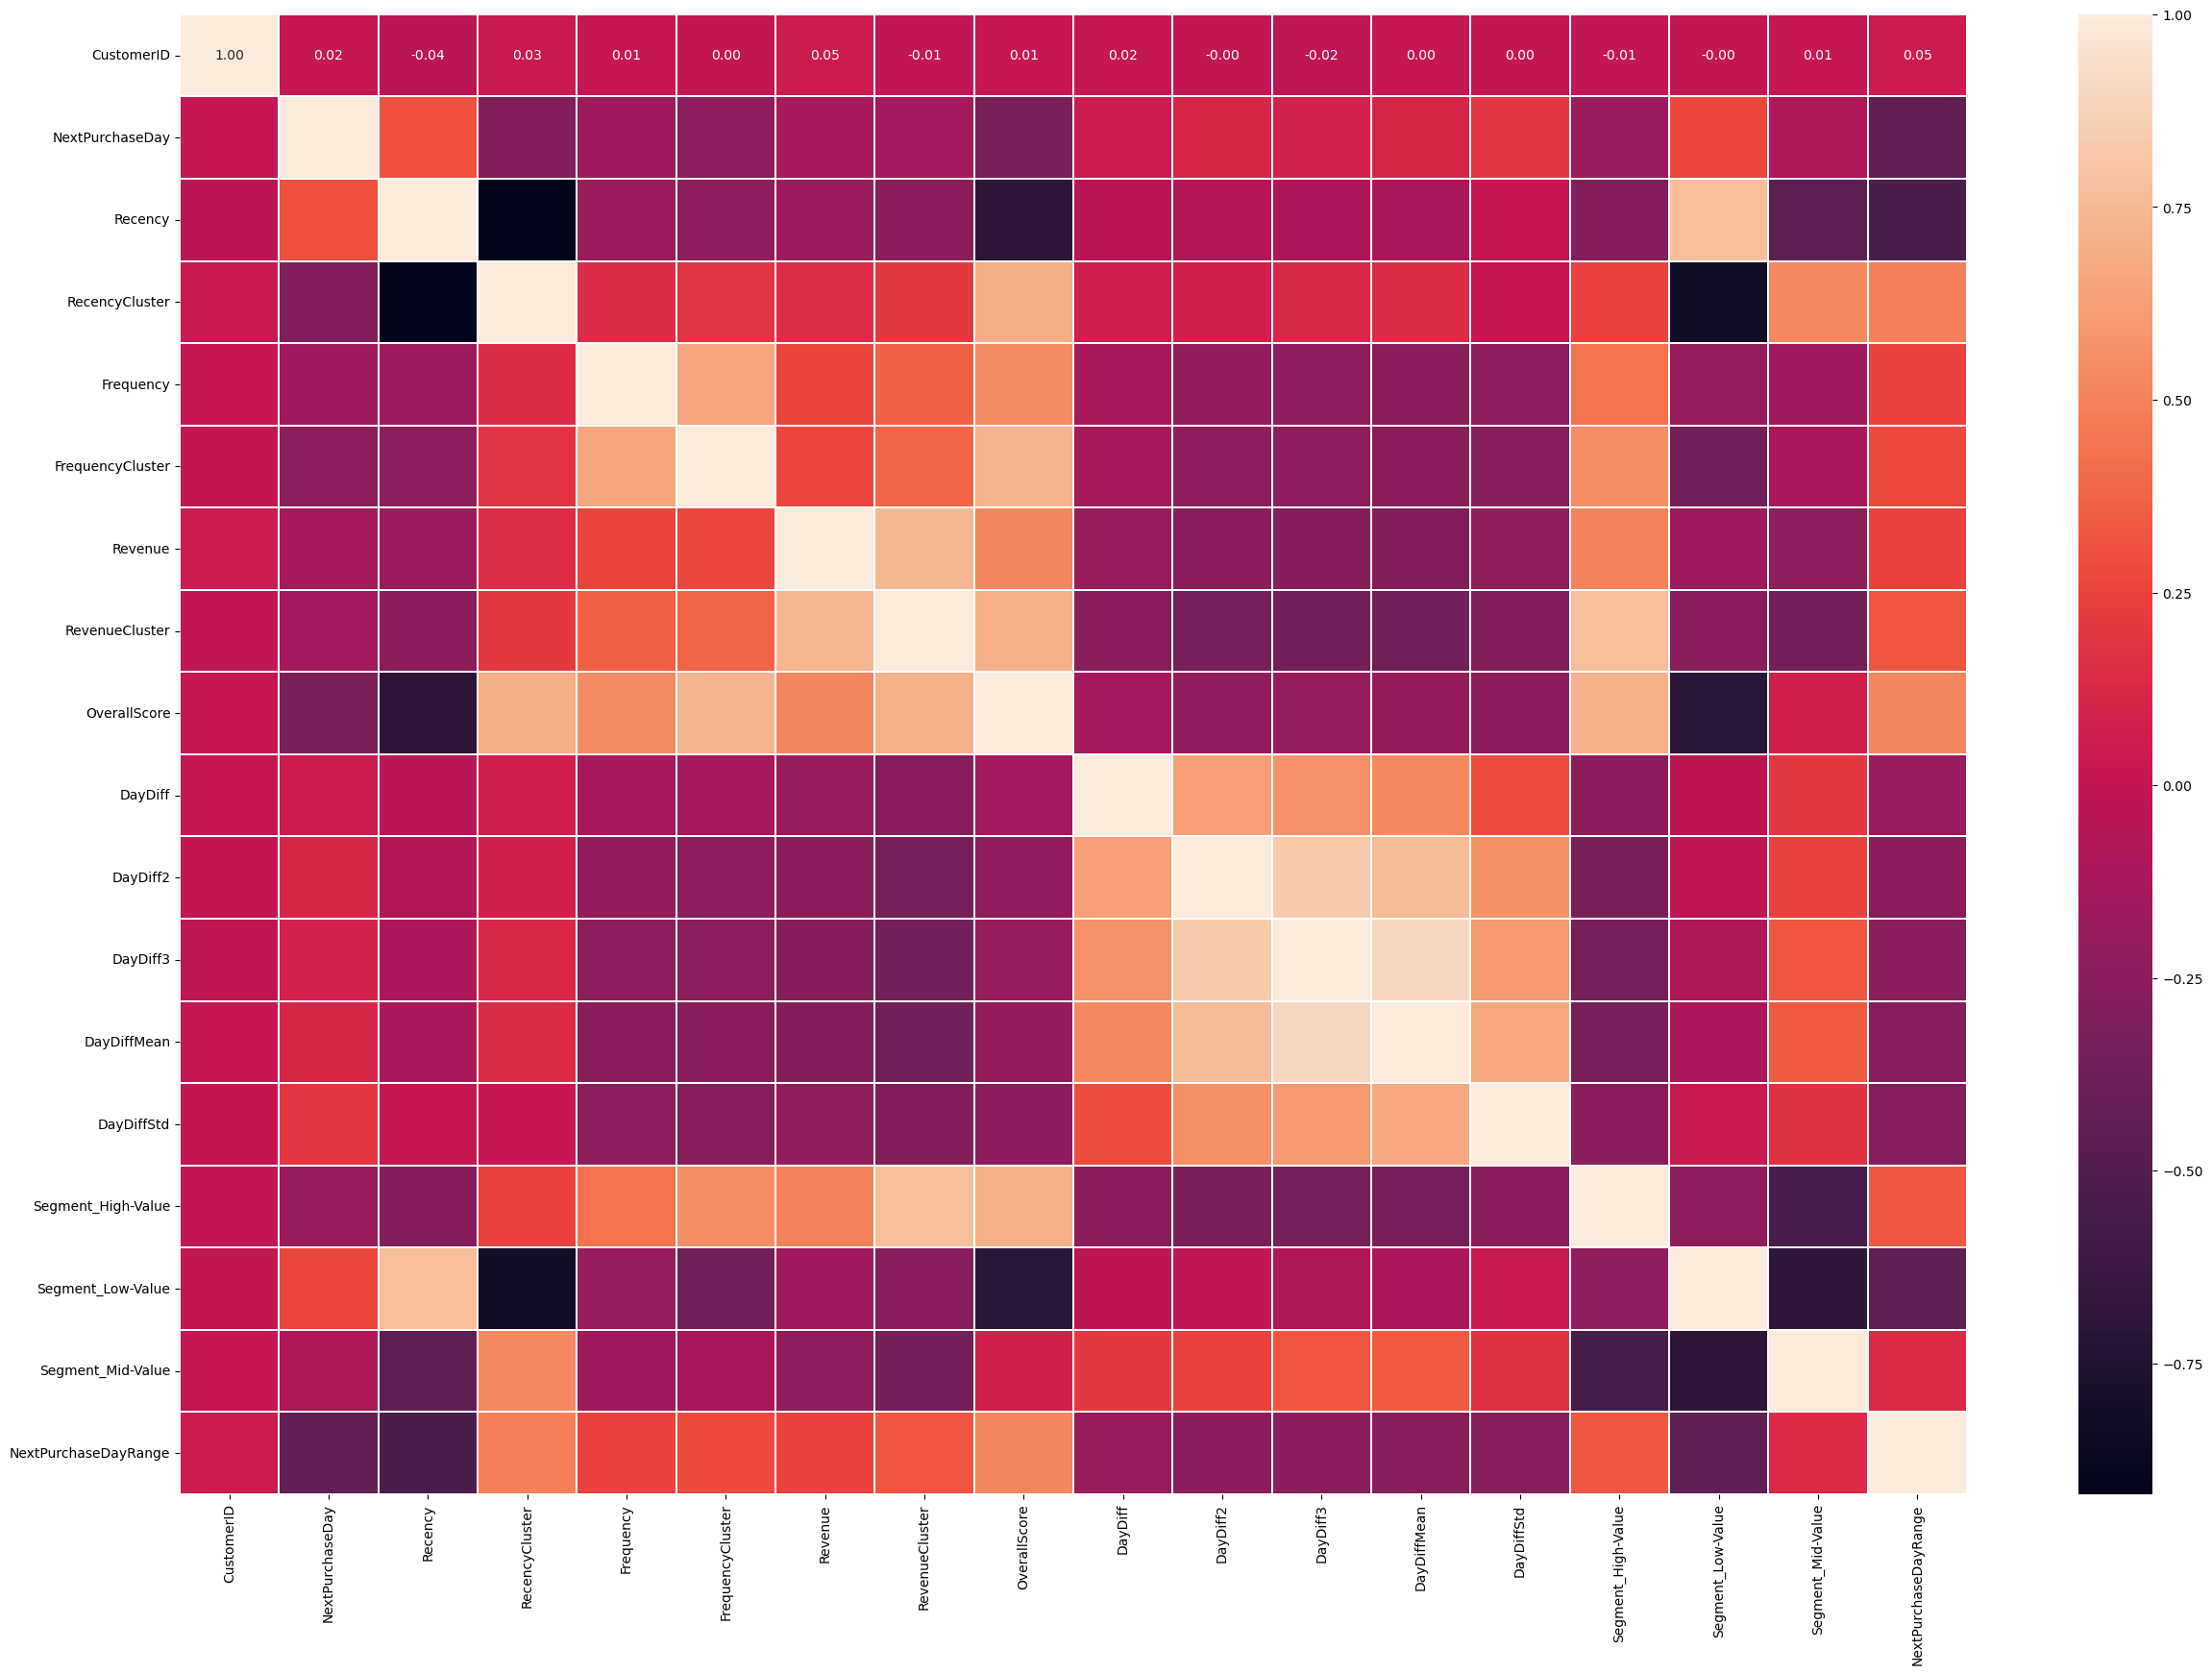

In [400]:
corr = tx_class[tx_class.columns].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot = True, linewidths=0.2,fmt=".2f")

In [401]:
tx_class = tx_class.drop('NextPurchaseDay',axis=1)

In [402]:
X, y = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class['NextPurchaseDayRange']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [410]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

for name, model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    print(name,cv_result)

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\TMQ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR [0.6184739  0.59437751]
NB [0.65461847 0.61445783]
RF [0.6064257  0.57831325]
SVC [0.51807229 0.5060241 ]
Dtree [0.59437751 0.53815261]
XGB [0.58634538 0.57429719]
KNN [0.48995984 0.51405622]


In [404]:
#Chọn XGB để Hyperparameter
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train,y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns],y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.69


In [405]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        55
           1       0.68      0.65      0.67        52
           2       0.67      0.56      0.61        18

    accuracy                           0.69       125
   macro avg       0.68      0.66      0.67       125
weighted avg       0.69      0.69      0.69       125



In [406]:
## HyperParameter
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(),param_grid = param_test1, scoring = 'accuracy')
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.6122828282828283)

In [407]:
xgb_model = xgb.XGBClassifier(max_depth = 3, min_child_weight = 3).fit(X_train,y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train,y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns],y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.62


In [408]:
y_pred = xgb_model.predict(X_test)
len(y_pred)

125

In [409]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        55
           1       0.63      0.52      0.57        52
           2       0.48      0.56      0.51        18

    accuracy                           0.62       125
   macro avg       0.59      0.61      0.60       125
weighted avg       0.63      0.62      0.62       125

